In [40]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

Clinic info

In [2]:
smile_on = pd.read_csv('../data/smile_on_clean.csv', parse_dates = ['call_start'])

C:\Users\Erin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
smile_on.shape

(57486, 112)

In [4]:
smile_on.head()

,Unnamed: 0,report_num,reg_or_appt,related_reports,call_start,call_end,call_length,patient_id,city,county,...,si_enroller_location,tp_completed,tp_developed,tp_yay,ve_transport,ve_eligibility_verified,bocq_next_step,di_language,referred,pe_next_step
0,0,93115324,SMILE ON 60+ Registration,NaN,2021-09-30 16:56:00,2021-09-30 16:57:00,1,3638169,Smyrna,Rutherford,...,NaN,NaN,NaN,NaN,NaN,NaN,Referred to dental clinic,English,NaN,Continued with Navigation
1,1,93115188,SMILE ON 60+ Registration,NaN,2021-09-30 16:53:00,2021-09-30 16:53:00,0,4431194,Nashville,Davidson,...,Referral Follow-Up,NaN,NaN,NaN,NaN,NaN,Referred to dental clinic,English,NaN,Continued with Navigation
2,2,93115081,SMILE ON 60+ Clinical,NaN,2021-09-30 16:50:00,2021-09-30 16:51:00,1,2941341,Memphis,Shelby,...,Provider Site,No,Yes,No,NaN,NaN,Referred to dental clinic,NaN,NaN,Continued with Navigation
3,3,93115032,SMILE ON 60+ Clinical,NaN,2021-09-30 16:48:00,2021-09-30 16:49:00,1,3823933,Memphis,Shelby,...,Provider Site,No,Yes,No,NaN,NaN,NaN,NaN,NaN,Continued with Navigation
4,4,93114968,SMILE ON 60+ Clinical,NaN,2021-09-30 16:46:00,2021-09-30 16:48:00,2,3348256,Memphis,Shelby,...,Provider Site,No,Yes,No,NaN,NaN,NaN,NaN,NaN,Continued with Navigation


In [5]:
#unique clinics providing care - 32
unique_clinics = smile_on['si_enroller_id'].unique()
unique_clinics

array([nan, 'Christ Community Health Services- Broad Avenue',
       'Christ Community Health Services- Raleigh',
       'Neighborhood Health - Cleveland Park/ Nashville',
       'Neighborhood Health - Lebanon',
       'Interfaith Dental Clinic - Murfreesboro',
       'Christ Community Health Services- Frayser',
       'Healing Hands Health Center - Bristol',
       'Karis Dental Clinic - Cleveland',
       'Interfaith Dental Clinic - Nashville',
       'Northeast Tennessee Community Health Centers Inc. - Johnson City',
       'Matthew Walker Comprehensive Health Center Inc. - Nashville',
       'Christ Community Health Services- Hickory Hill',
       'Keystone Dental Care Inc. - Johnson City',
       'Friends in Need Health Center - Kingsport',
       'Interfaith Health Clinic of Knoxville - Knoxville',
       'Meharry Mobile Dental Clinic', 'Matthew Walker - Clarksville',
       'Mountain Hope Good Shepherd Clinic', 'TDH - Maury Co',
       'Reelfoot Ministries - Obion', 'Church Heal

In [6]:
#total appointments at all clinics
smile_on["si_enroller_id"].value_counts().sum()

46961

In [7]:
#total patients seen per clinic
smile_on["si_enroller_id"].value_counts()
smile_on.loc[smile_on.index.isin(['SMILE ON 60+ Clinical'])]

,Unnamed: 0,report_num,reg_or_appt,related_reports,call_start,call_end,call_length,patient_id,city,county,...,si_enroller_location,tp_completed,tp_developed,tp_yay,ve_transport,ve_eligibility_verified,bocq_next_step,di_language,referred,pe_next_step


In [21]:
print(smile_on.columns.tolist())

['Unnamed: 0', 'report_num', 'reg_or_appt', 'related_reports', 'call_start', 'call_end', 'call_length', 'patient_id', 'city', 'county', 'state', 'zip_code', 'EnteredByWorkerNum', 'date_entered', 'di_household_size', 'birth_year', 'oec_1351', 'oec_1354', 'oec_2140', 'oec_2150', 'oec_2160', 'oec_2161', 'oec_230', 'oec_2330', 'oec_2331', 'oec_2332', 'oec_2335', 'oec_2390', 'oec_2391', 'oec_2392', 'oec_2393', 'oec_2394', 'oec_2915', 'oec_2920', 'oec_2933', 'oec_2940', 'oec_2950', 'oec_2954', 'oec_2980', 'oec_3220', 'oec_4341', 'oec_4342', 'oec_6930', 'oec_6980', 'oec_7111', 'oec_7140', 'oec_7210', 'oec_7220', 'oec_7230', 'oec_7240', 'oec_7241', 'oec_7250', 'oec_7261', 'oec_7286', 'oec_7310', 'oec_7311', 'oec_7320', 'oec_7321', 'oec_7410', 'oec_7411', 'oec_7471', 'oec_7510', 'oec_7971', 'oec_7972', 'oec_9110', 'oec_9951', 'scrn_date_of_last', 've_verified_date', 'bocq_eat_limited', 'bocq_dental_clinic', 'bocq_client_commit', 'bocq_help_other', 'bocq_need_help', 'bocq_appearance', 'bocq_cond

# Exploring the transportation question

In [8]:
smile_on["cmi_transport_barriers"].value_counts()

Cost; Availability - no car/access to transportation    1618
Availability - no car/access to transportation          1275
Cost                                                     817
Name: cmi_transport_barriers, dtype: int64

In [9]:
smile_on["cmi_transport_barriers"] = smile_on["cmi_transport_barriers"].replace({"Availability - no car/access to transportation": "Availability",
                                                       "Cost; Availability - no car/access to transportation": "Both"},)

In [10]:
smile_on["cmi_transport_barriers"].value_counts()

Both            1618
Availability    1275
Cost             817
Name: cmi_transport_barriers, dtype: int64

In [35]:
#create dataframes based on tranportation barriers
smile_on1 = smile_on[['patient_id','reg_or_appt',"cmi_transport_barriers","ve_transport"]]
both = smile_on1.loc[smile_on["cmi_transport_barriers"].isin(['Both'])]
availability = smile_on1.loc[smile_on["cmi_transport_barriers"].isin(['Availability'])]
cost = smile_on1.loc[smile_on["cmi_transport_barriers"].isin(['Cost'])]
both.shape

(1618, 4)

In [33]:
both["ve_transport"].value_counts()

No     109
Yes     55
Name: ve_transport, dtype: int64

ValueError: x and y must have same first dimension, but have shapes (1618,) and (2,)

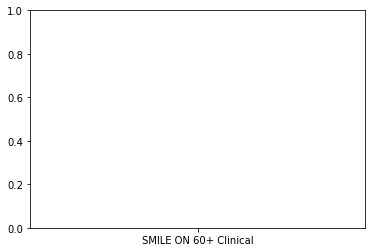

In [43]:
fig, ax = plt.subplots()
ax.plot(both["reg_or_appt"], both["ve_transport"].value_counts())

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Display the figure
plt.show()

In [37]:
both.groupby('patient_id').size()

patient_id
2392454     8
2399825     7
2399840     9
2404190    24
2408029    23
           ..
4439826     5
4440903     1
4473724     1
4517573     5
4522294     2
Length: 313, dtype: int64

In [28]:
transport["patient_id"].value_counts()

3212379    54
2758373    42
2390065    25
2511808    25
2404190    24
           ..
2612122     1
2628508     1
4433602     1
2413503     1
3041273     1
Name: patient_id, Length: 664, dtype: int64

In [31]:
patient_3212379 = transport[transport["patient_id"] == "3820972"]
patient_3212379

,patient_id,reg_or_appt,cmi_transport_barriers,ve_transport


In [ ]:
# y-axis in bold
plt('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 2493042     1
 2797406     1
 2499719     1
 2599558     1
 2649056     1
Name: patient_id, Length: 10424, dtype: int64

,Unnamed: 0,report_num,reg_or_appt,related_reports,call_start,call_end,call_length,patient_id,city,county,...,si_enroller_location,tp_completed,tp_developed,tp_yay,ve_transport,ve_eligibility_verified,bocq_next_step,di_language,referred,pe_next_step


In [22]:
# split column into multiple columns by delimiter 
smile_on['cmi_barriers_to_care'].str.split(';', expand=True)

,0,1,2,3,4,5
0,No insurance,None,None,None,None,None
1,Dental cost,No insurance,None,None,None,None
2,Dental cost,No insurance,None,None,None,None
3,Dental cost,No insurance,Fear,None,None,None
4,Transportation,Dental cost,No insurance,None,None,None
...,...,...,...,...,...,...
57481,Dental cost,No insurance,None,None,None,None
57482,No insurance,None,None,None,None,None
57483,NaN,NaN,NaN,NaN,NaN,NaN
57484,Dental cost,No insurance,None,None,None,None
